In [20]:
import nltk
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

import matplotlib.pyplot as plt

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ikgha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikgha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ikgha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ikgha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [5]:
df=pd.read_csv("../data/Airplane_Crashes_and_Fatalities.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
df.fillna('', inplace=True)

In [8]:
df['Merged_Text'] = df['Location'] + " " + df['Operator'] + " " + df['Route'] + " " + df['AC Type'] + " " + df['Summary']
df['Merged_Text'] = df['Merged_Text'].str.strip()

#### Text Processing

In [15]:
stop_words = set(stopwords.words('english')) ## assuming that the main language is english
lemmatizer = WordNetLemmatizer()

In [11]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)

----

In [16]:
df['Processed_Text'] = df['Merged_Text'].apply(preprocess_text)

In [17]:
df['Processed_Text'] 

0       fort myer virginia military u army demonstrati...
1       juvisysurorge france air show wright byplane e...
2       atlantic city new jersey military u navy test ...
3       victoria british columbia canada private curti...
4       north sea military german navy zeppelin l1 air...
                              ...                        
4962    puerto montt chile archipelago service aereos ...
4963    near monclava mexico tvpx aircraft solution la...
4964    moscow russia aeroflot russian international a...
4965    near lipo india military indian air force jorh...
4966    rawalpindi india military pakistan army traini...
Name: Processed_Text, Length: 4967, dtype: object

In [28]:
df['Processed_Summary'] = df['Summary'].apply(preprocess_text)

In [29]:
df['Processed_Summary'] 

0       demonstration flight u army flyer flown orvill...
1       eugene lefebvre first pilot ever killed air ac...
2       first u dirigible akron exploded offshore alti...
3       first fatal airplane accident canada occurred ...
4       airship flew thunderstorm encountered severe d...
                              ...                        
4962    aircraft initial climb plane lost height crash...
4963    aircraft crashed en route return trip la vega ...
4964    fortyfive minute taking moscow sheremetyevo ai...
4965                             crashed 34km wnw mechuka
4966    pakistani military plane training flight crash...
Name: Processed_Summary, Length: 4967, dtype: object

-----

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
#we should also avoid redundant words as they won't help much with the analysis
custom_stopwords = [
    "plane", "aircraft", "flight", "airline", "operator", "aboard", "crew",
    "passengers", "route", "registration", "cn", "ln", "crash", "crashed",
    "accident", "incident", "wreckage", "impact", "disaster",
    "en", "route", "taking", "shortly", "attempting","pilot","aircraft"]

### Topic Clustering

#### Cluster Analysis using TF-IDF

In [56]:

vectorizer = TfidfVectorizer(stop_words=custom_stopwords,max_features=5000, ngram_range=(1,2))  # Use unigrams & bigrams
X = vectorizer.fit_transform(df['Processed_Summary'])


In [57]:
inertia = []
k_values = range(2, 11)  # Test different k values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

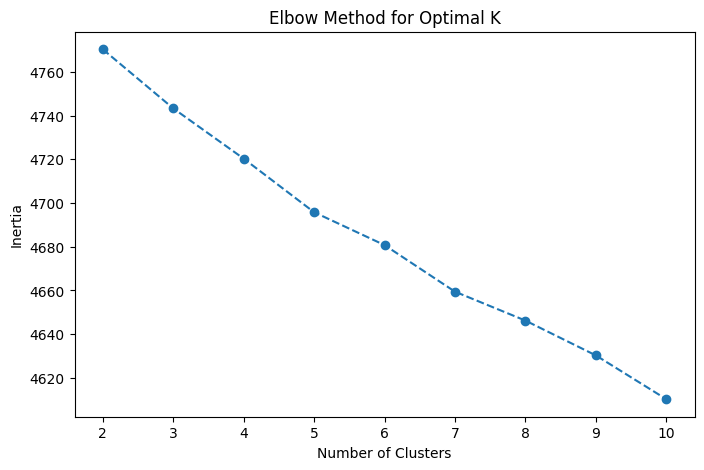

In [58]:
# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [59]:
optimal_k = 5  # the optimal is 5 but still 5 seems like a lot of clusters?
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [60]:
import numpy as np

def get_top_keywords(model, feature_names, n_words=10):
    top_keywords = []
    for cluster_id in range(model.n_clusters):
        centroid = model.cluster_centers_[cluster_id]
        top_indices = centroid.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_keywords.append(", ".join(top_words))
    return top_keywords

feature_names = vectorizer.get_feature_names_out()
top_keywords_per_cluster = get_top_keywords(kmeans, feature_names)

for i, words in enumerate(top_keywords_per_cluster):
    print(f"Cluster {i}: {words}")

Cluster 0: control, sea, shot, helicopter, unknown, airport, killed, cargo, ground, mile
Cluster 1: engine, takeoff, failure, engine failure, emergency, fire, failed, landing, engine failed, emergency landing
Cluster 2: runway, approach, land, short, short runway, landing, cargo, fog, airport, heavy
Cluster 3: weather, poor weather, poor, weather condition, condition, adverse weather, adverse, mountain, vfr, mountain poor
Cluster 4: mountain, struck mountain, struck, flew, ft, flew mountain, error, cargo, fog, slope


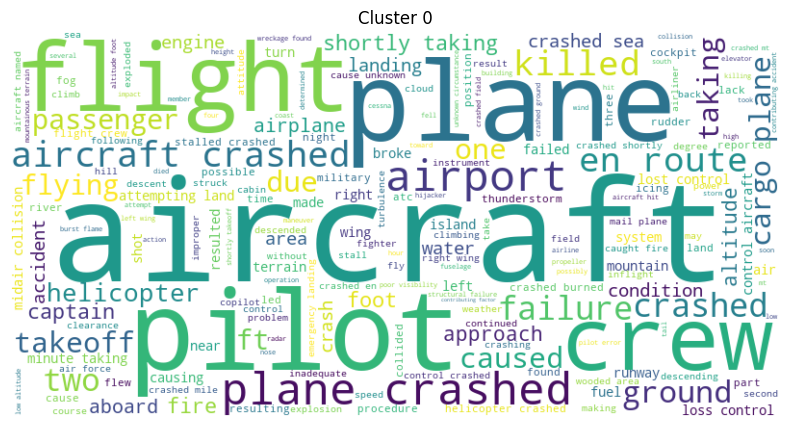

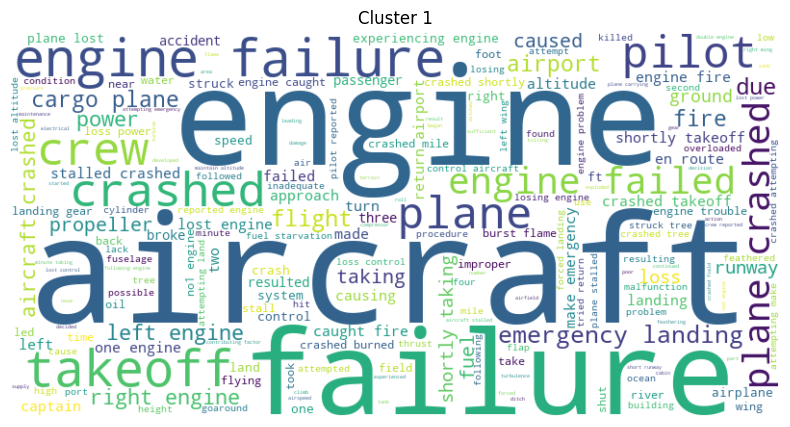

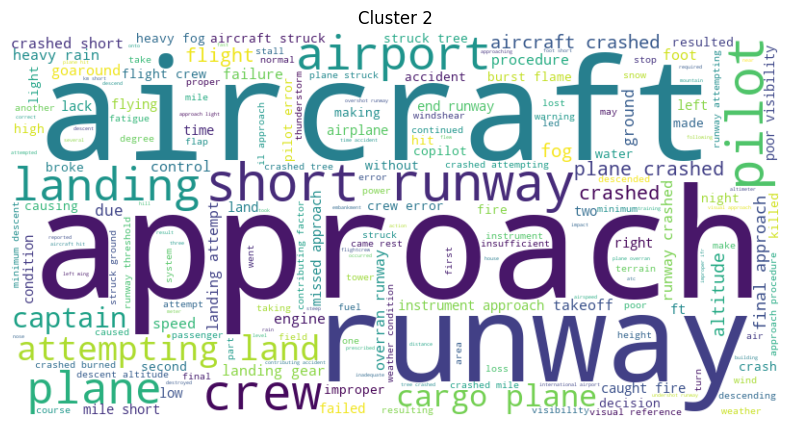

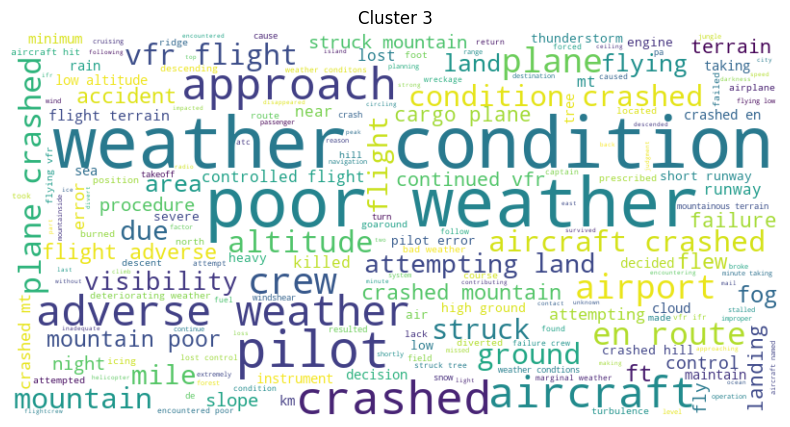

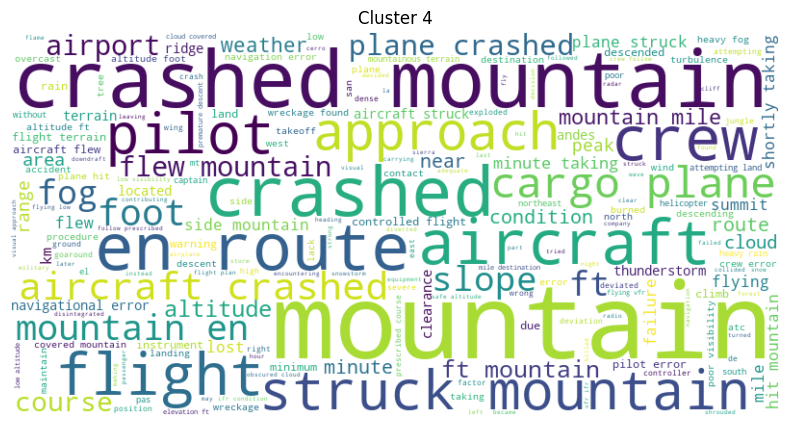

In [61]:
from wordcloud import WordCloud

for cluster_id in range(optimal_k):
    cluster_texts = " ".join(df[df['Cluster'] == cluster_id]['Processed_Summary'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id}')
    plt.show()

In [62]:
from sklearn.metrics import silhouette_score

K=2, Silhouette Score: 0.0103
K=3, Silhouette Score: 0.0093
K=4, Silhouette Score: 0.0103
K=5, Silhouette Score: 0.0117
K=6, Silhouette Score: 0.0124
K=7, Silhouette Score: 0.0139
K=8, Silhouette Score: 0.0143
K=9, Silhouette Score: 0.0151


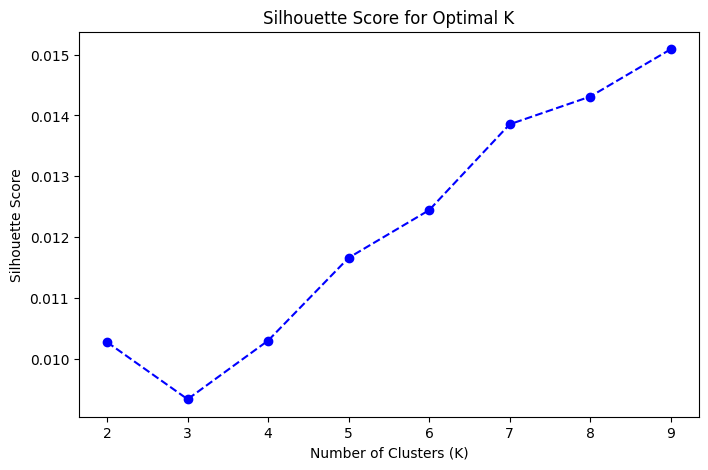

In [63]:
#Let's try to see if it would be different using the Silhouette Score method with KMeans

# Compute Silhouette Scores for different values of K
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score: {score:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

##General idea is that the higher the silhouette score, the better the clustering, here is seem that the higher the silhouette score is the better the clustering is and which mean that clusters might be overlapping

#### Clustering using BERT (with TF IDF, the clustering seem to be overlapping, let's try BERT)

In [68]:
from sentence_transformers import SentenceTransformer

# Use a pre-trained BERT model to get better text embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X_Bert = model.encode(df['Processed_Summary'], convert_to_tensor=True) ## haha XPERT

In [69]:
vectorizer_Bert = TfidfVectorizer(stop_words=custom_stopwords, max_features=10000)


K=2, Silhouette Score: 0.0343
K=3, Silhouette Score: 0.0481
K=4, Silhouette Score: 0.0355
K=5, Silhouette Score: 0.0450
K=6, Silhouette Score: 0.0454
K=7, Silhouette Score: 0.0452
K=8, Silhouette Score: 0.0464
K=9, Silhouette Score: 0.0461


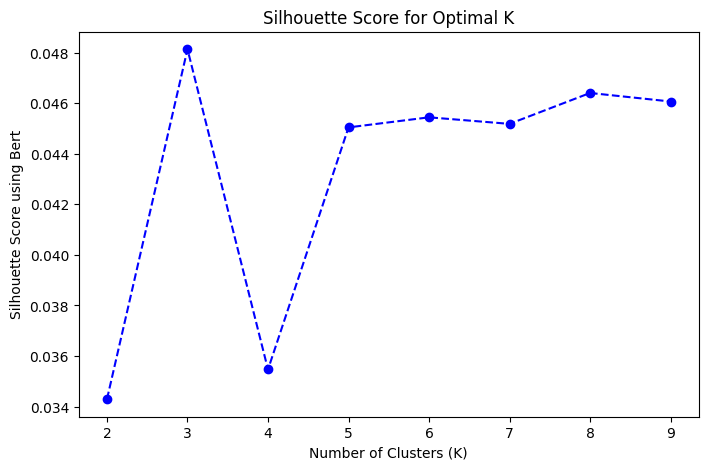

In [70]:
# Compute Silhouette Scores for different values of K
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_Bert)
    score = silhouette_score(X_Bert, cluster_labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score: {score:.4f}")

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score using Bert")
plt.title("Silhouette Score for Optimal K")
plt.show()

In [71]:
# optimal_k = 3  # Set based on Silhouette Score using Bert

# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
# df['Cluster'] = kmeans.fit_predict(X)

# # Print new cluster topics
# for i in range(optimal_k):
#     print(f"Cluster {i}:")
#     print(df[df['Cluster'] == i]['Processed_Summary'].sample(5).values)  # Show sample summaries
#     print("-" * 50)

Cluster 0:
['' '' '' '' '']
--------------------------------------------------
Cluster 1:
['While attempting to take off, the helicopter struck a crane, crashed on to the deck of the Maersk Resilient oil drilling rig, broke up and fell into the sea 43 miles off Duabi.'
 'While returning from an aborted barrier mission, the aircraft hit a seawall at end of short runway. The main landing geart was sheared off and the aircraft cartwheeled, slid into a vehicle, exploded and burned.'
 'The helicopter crashed after the main rotor failed. No occupants ever found.'
 'The cargo plane crashed into the ocean.'
 'The cargo plane lost control and crashed into a mountainside while en route. Failure of the first officer to maintain control of the aircraft after becoming spatially disoriented and his exceeding the design stress limits of the aircraft. Factors related to the accident were: the lack of two pilots in the cockpit, darkness, and instrument meteorological conditions at flight altitude.']
--

In [72]:
def get_top_keywords(model, feature_names, n_words=10):
    top_keywords = []
    for cluster_id in range(model.n_clusters):
        centroid = model.cluster_centers_[cluster_id]
        top_indices = centroid.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_keywords.append(", ".join(top_words))
    return top_keywords

feature_names = vectorizer.get_feature_names_out()
top_keywords_per_cluster = get_top_keywords(kmeans, feature_names)

for i, words in enumerate(top_keywords_per_cluster):
    print(f"Cluster {i}: {words}")

NotFittedError: Vocabulary not fitted or provided

In [ ]:
from wordcloud import WordCloud

for cluster_id in range(optimal_k):
    cluster_texts = " ".join(df[df['Cluster'] == cluster_id]['Processed_Summary'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster_id}')
    plt.show()

-----